Notebook do uczenia sieci

In [45]:
# Import Bibliotek
import tensorflow as tf
import numpy as np
import pathlib
import os

In [53]:
# Definicja zmiennych
model_name = "my_model.keras"

batch_size = 32
img_height = 256
img_width = 256

data_dir = pathlib.Path("D:\Dokumenty\Programowanie\IsItAi_SztuczInt_Proj\Real_AI_SD_LD_Dataset\Data_2")

num_classes = 2


checkpoint_path = "training_1/cp.weights.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)


In [ ]:
# Załadowanie modelu

In [23]:
# Ładowanie datasetu do nauki sieci
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  seed=14,
  validation_split=0.2,
  subset="training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2971 files belonging to 2 classes.
Using 2377 files for training.


In [24]:
# Ładowanie datasetu do walidacji 
test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=14,
  image_size=(img_height, img_width),
  batch_size=batch_size)
# )

Found 2971 files belonging to 2 classes.
Using 594 files for validation.


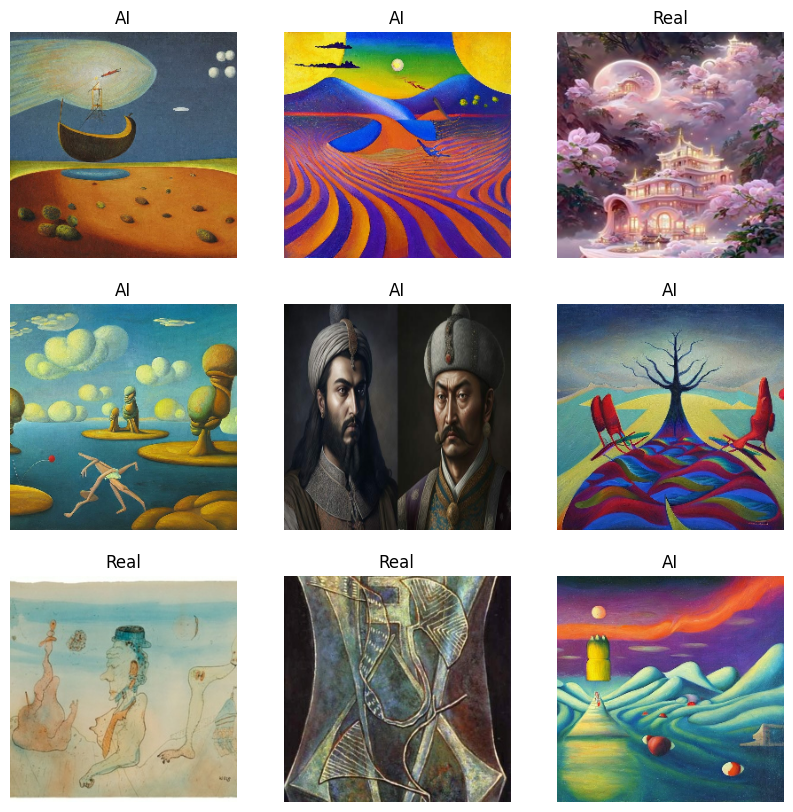

In [25]:
# Wyświetlenie przykładowych danych
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [26]:
# Normalizacja danych 
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [27]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = normalized_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [35]:
# Model
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),

    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),

    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [54]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True,verbose=1)

In [36]:
# model.compile(
#   optimizer='adam',
#   loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
#   metrics=['accuracy'])

model.load_weights(checkpoint_path)

In [55]:
model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=2,
  verbose=1,
  callbacks=[cp_callback]
)

Epoch 1/2
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 663ms/step - accuracy: 0.5241 - loss: 0.6921
Epoch 1: saving model to training_1/cp.weights.h5
75/75 ━━━━━━━━━━━━━━━━━━━━ 53s 713ms/step - accuracy: 0.5240 - loss: 0.6921 - val_accuracy: 0.4882 - val_loss: 3.1773
Epoch 2/2
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 664ms/step - accuracy: 0.5241 - loss: 0.6921
Epoch 2: saving model to training_1/cp.weights.h5
75/75 ━━━━━━━━━━━━━━━━━━━━ 54s 716ms/step - accuracy: 0.5240 - loss: 0.6921 - val_accuracy: 0.4882 - val_loss: 3.1769


In [56]:
test_loss, test_accuracy = model.evaluate(test_ds)

19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 192ms/step - accuracy: 0.4756 - loss: 3.2674


In [57]:
model.save(model_name)
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_7 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256, 256, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256, 256, 32)   │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 254, 254, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 246016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 2)              │       492,034 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,562,888 (5.96 MB)

 Trainable params: 520,962 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,041,926 (3.97 MB)